# VRP AI

## Intro

TODO

## Bootstrap

In [1]:
%load_ext autoreload
%autoreload 2

from vrp_ai.instances import *
from vrp_ai.quadkey import *
from vrp_ai.encoder import *
from vrp_ai.tokenizer import *

instance_root_dir = '/home/builuk/temp/vrp/my/test_data/scientific/vrplib_data_set'  # where to store vrp instances
cache_root_dir = './vrp_ai/cache'                                                    # where to store cache
force_train_tokenizer = True                                                         # force training tokenizer ignoring cache

## Get VRP Data

First, we need to get test data

TODO: describe terminology: what is the problem, instance and solution

In [2]:
instance_registry = VrpInstanceRegistry(instance_root_dir)

test_instances = instance_registry.get_instances(instance_type = 'vrptw', instance_format = 'solomon')

test_instances

total instances of instance_type='cvrp': 275
processed 20
processed 40
processed 60
processed 80
processed 100
processed 120
processed 140
processed 160
processed 180
processed 200
processed 220
processed 240
processed 260
total instances of instance_type='vrptw': 356
processed 20
processed 40
processed 60
processed 80
processed 100
processed 120
processed 140
processed 160
processed 180
processed 200
processed 220
processed 240
processed 260
processed 280
processed 300
processed 320
processed 340


[VrpInstance[name=C101, vehicles=25, customers=101, routes=10, cost=827.3],
 VrpInstance[name=C102, vehicles=25, customers=101, routes=10, cost=827.3],
 VrpInstance[name=C103, vehicles=25, customers=101, routes=10, cost=826.3],
 VrpInstance[name=C104, vehicles=25, customers=101, routes=10, cost=822.9],
 VrpInstance[name=C105, vehicles=25, customers=101, routes=10, cost=827.3],
 VrpInstance[name=C106, vehicles=25, customers=101, routes=10, cost=827.3],
 VrpInstance[name=C107, vehicles=25, customers=101, routes=10, cost=827.3],
 VrpInstance[name=C108, vehicles=25, customers=101, routes=10, cost=827.3],
 VrpInstance[name=C109, vehicles=25, customers=101, routes=10, cost=827.3],
 VrpInstance[name=C201, vehicles=25, customers=101, routes=3, cost=589.1],
 VrpInstance[name=C202, vehicles=25, customers=101, routes=3, cost=589.1],
 VrpInstance[name=C203, vehicles=25, customers=101, routes=3, cost=588.7],
 VrpInstance[name=C204, vehicles=25, customers=101, routes=3, cost=588.1],
 VrpInstance[nam

## Encode

### Single test instance (for visualization purpose)

In [4]:
from pathlib import Path

instance_dir = 'vrptw'
instance_format = 'solomon'
instance_name = 'C101'

# instance_dir = 'cvrp'
# instance_format = 'vrplib' 
# instance_name = 'X-n101-k25'


problem_path = Path(instance_root_dir).joinpath(instance_dir, f"{instance_name}.vrp")
solution_path = Path(instance_root_dir).joinpath(instance_dir, f"{instance_name}.sol")

instance = VrpInstance(instance_name, instance_format, problem_path, solution_path)

instance

VrpInstance[name=C101, vehicles=25, customers=101, routes=10, cost=827.3]

### Build quad trees

In [4]:
# def get_quad_tree_encoding(quad_tree, modifier_fn):
#     return dict((point.data, modifier_fn(node.key.encode())) for node in find_children(quad_tree.root) if node.points for point in node.points)

# def shift_code(s, offset):
#     return ''.join(map(lambda c: chr(ord(c) + offset), s))


#### Distances

/home/builuk/.local/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.000259600013588906 and the largest is 5.677164140643505.
  warn(


Number of segments: 244
Minimum segment area: 0.000 units


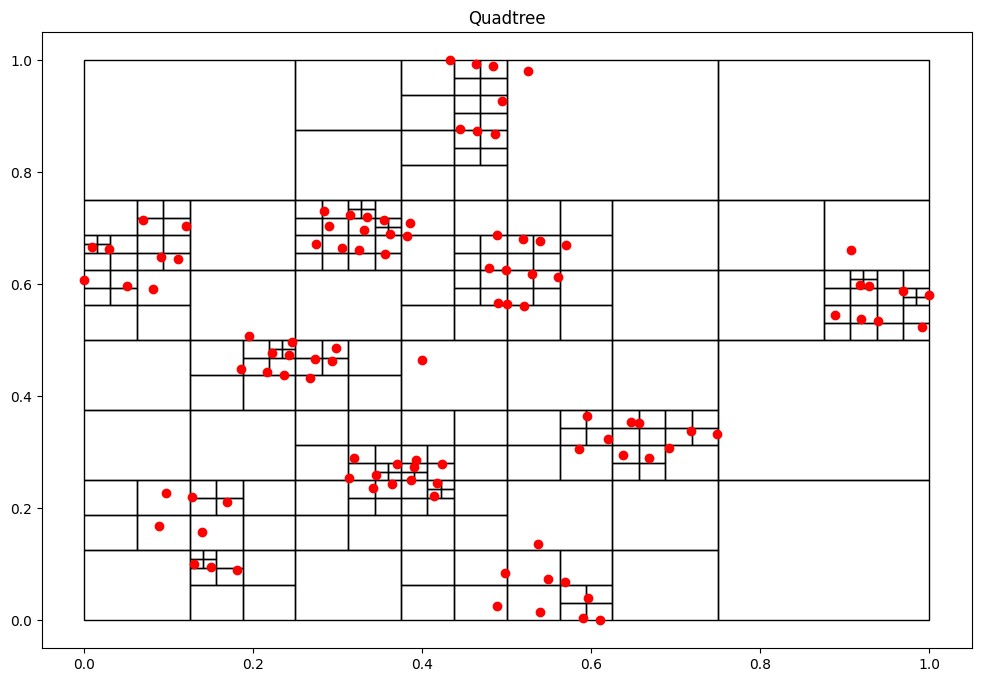

In [36]:
# import skbio
# import numpy as np


# def get_spatial_encoding(distance_matrix, visualize=False):
#     # normalize distances inside [0, 1] range
#     def normalize(matrix):
#         return (matrix - np.min(matrix)) / (np.max(matrix) - np.min(matrix))

#     distance_matrix = normalize(distance_matrix)

#     # get new coordinates usin PCoA
#     pcoa_dists = skbio.stats.ordination.pcoa(distance_matrix)        
#     pcoa_coords = np.stack([normalize(pcoa_dists.samples['PC1']), normalize(pcoa_dists.samples['PC2'])], axis=1)

#     # build a dedicated quad tree
#     spatial_quad_tree = QuadTree(split_threshold = 1, rect_size = 1)
#     for idx, coord in enumerate(pcoa_coords):
#         spatial_quad_tree.add_point(Point(coord[0], coord[1], idx))

#     spatial_quad_tree.subdivide()

#     if visualize:
#         spatial_quad_tree.visualize()

#     spatial_encoding = get_quad_tree_encoding(spatial_quad_tree, lambda s: s)

#     return spatial_encoding

get_spatial_features(instance.distance_matrix, visualize=True)

#### Temporal encoding

Number of segments: 130
Minimum segment area: 0.001 units


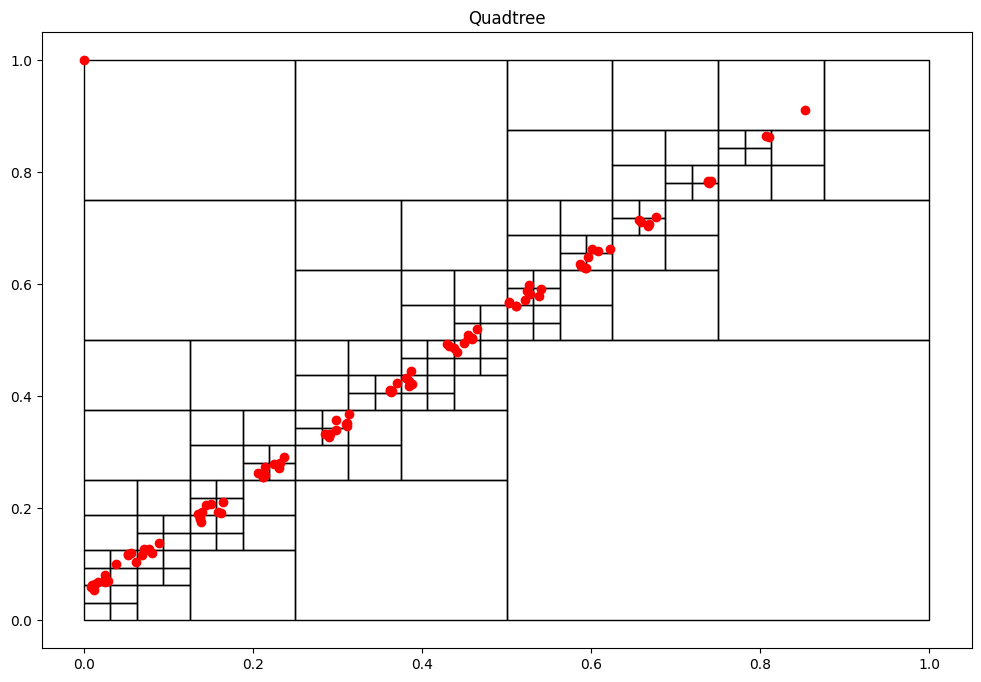

In [37]:
# def get_temporal_encoding(customers, visualize=False):
#     customer_times = [time for customer in customers for time in customer.times]
#     min_time, max_time = min(customer_times), max(customer_times)

#     customer_times = [(np.array(customer.times) - min_time) / (max_time - min_time) for customer in customers]

#     time_quad_tree = QuadTree(split_threshold = 1, lod_threshold= 4, rect_size = 1)

#     for idx, time in enumerate(customer_times):
#         time_quad_tree.add_point(Point(time[0], time[1], idx))

#     time_quad_tree.subdivide()
#     if visualize:
#         time_quad_tree.visualize()
    
#     temporal_encoding = get_quad_tree_encoding(time_quad_tree, lambda s: shift_code(s, offset = 4))

#     return temporal_encoding

get_temporal_feature(instance.customers, visualize=True)

### Encode routes

In [7]:
# def encode_routes(instance):
#     spatial_encoding = get_spatial_encoding(instance.distance_matrix)
#     temporal_encoding = get_temporal_encoding(instance.customers)

#     def encode_activity(activity):
#         idx = activity.idx
#         return spatial_encoding[idx] + ' ' + temporal_encoding[idx]

#     encoded_routes = [[encode_activity(activity) for activity in route] for route in instance.routes]
#     encoded_routes = [', '.join(route) + '.' for route in encoded_routes]
#     encoded_routes = '\n'.join(encoded_routes)

#     return encoded_routes

encode_routes(instance)

/home/builuk/.local/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.000259600013588906 and the largest is 5.677164140643505.
  warn(


'\n\n033 66, 03102 44446, 031002 44467, 030113 44746, 030110 46554, 03012 47465, 03010 47657, 01232 47767, 01233 74464, 031000 74654, 013230 74765, 013232 76557, 03101 77467, 033 66.\n033 66, 00321 44464, 00322 44476, 0023 44764, 0021 46555, 0030 47467, 001220 47746, 001221 65554, 00121 74464, 033 66.\n033 66, 03223 44446, 023333 44467, 023331 44746, 023330 46554, 201 47465, 0232 47657, 02330 47776, 02331 74464, 0320 74654, 03220 74765, 03221 76555, 033 66.\n033 66, 20211 44464, 20210 44654, 20231 44765, 20230 46555, 202021 47467, 202020 47746, 20022 65554, 20023 74465, 2003 74657, 033 66.\n033 66, 21211 44464, 212311 44467, 2130 44764, 2132 46554, 212312 47465, 21230 47657, 212321 47776, 212320 74446, 21223 74654, 21221 74765, 21202 76557, 21203 77467, 21212 776, 033 66.\n033 66, 23132 44464, 23133 44654, 23313 44764, 32 46555, 23333 47467, 23332 47746, 2332 65554, 23310 74466, 033 66.\n033 66, 21131 44446, 30020 44467, 3000 44746, 30022 46554, 30023 47465, 3021 47657, 30203 47767, 30

## Train tokenizer

### Encode instances

In [8]:
# encoded_instance_files = []
# for instance in test_instances:
#     path = Path(cache_root_dir).joinpath(f"{instance.name}.enc")
#     encoded_instance = encode_routes(instance)
    
#     with open(path, 'w') as file:
#         file.write(encoded_instance)

#     encoded_instance_files.append(path)
    
# len(encoded_instance_files)

# TODO encode high level quad keys for temporal/spatial

encoded_instance_files = create_encoded_instances_on_disk(test_instances, cache_root_dir)

/home/builuk/.local/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.000259600013588906 and the largest is 5.677164140643505.
  warn(
/home/builuk/.local/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0

total encoded instance files: 356


### Train tokenizer


In [9]:
tokenizer = train_tokenizer(encoded_instance_files, cache_root_dir, alg = 'UNI')
vocab_size = tokenizer.get_vocab_size()

print(f"tokenizer: {vocab_size=}")



tokenizer: vocab_size=8000


## Train model

### Read test data

Prepare a train and validation data sets

In [10]:
# encoded_instance_data = ''
# for encoded_instance_file in encoded_instance_files:
#      with open(encoded_instance_file, 'r') as file:
#         content = file.read()
#         encoded_instance_data = encoded_instance_data + content

# print(f"{len(encoded_instance_data)=}")

encoded_instance_data = get_encoded_instances_from_disk(encoded_instance_files)

read total encoded instances: 23307280


### Tokenize test data

In [11]:
encode = lambda s: tokenizer.encode(s).ids # encoder: take a string, output a list of integers
decode = lambda l: tokenizer.decode(l)     # decoder: take a list of integers, output a string

In [12]:
import torch

data = torch.tensor(encode(encoded_instance_data), dtype=torch.long)

n = int(0.9 * len(data))
train_data = data[:n]
val_data = data[n:]

print(f"train and validation data: {len(train_data)} vs {len(val_data)}")

train and validation data: 8716863 vs 968541


### Train

##### Define hyper parameters and training loop

In [13]:
from vrp_ai.gpt import *

eval_interval = 10
max_iters = 1000
learning_rate = 3e-4
checkpoint_path = f"{cache_root_dir}/model.pt"

def train(model, optimizer):
    for iter in range(max_iters):
        # every once in a while evaluate the loss on train and val sets
        if iter % eval_interval == 0 or iter == max_iters - 1:
            losses = estimate_loss(model, train_data, val_data)
            print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
            torch.save({
                'epoch': iter,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': losses,
            }, checkpoint_path)


        # sample a batch of data
        xb, yb = get_batch('train', train_data, val_data)

        # evaluate the loss
        logits, loss = model(xb, yb)
        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

##### Actual training

In [22]:
model = GPT(vocab_size)
m = model.to(device)

# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# NOTE: actual training
train(model, optimizer)

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(model.generate(context, max_new_tokens=500)[0].tolist()))

16.804928 M parameters
step 0: train loss 9.0377, val loss 9.0091
step 10: train loss 5.3975, val loss 5.6557
step 20: train loss 4.3026, val loss 4.5288
step 30: train loss 3.8160, val loss 4.0429
step 40: train loss 3.6751, val loss 3.8794
step 50: train loss 3.6123, val loss 3.8207
step 60: train loss 3.4152, val loss 3.6588
step 70: train loss 3.3647, val loss 3.5700
step 80: train loss 3.2787, val loss 3.5205
step 90: train loss 3.2658, val loss 3.4994
step 100: train loss 3.2295, val loss 3.4242
step 110: train loss 3.2024, val loss 3.4108
step 120: train loss 3.1691, val loss 3.3768
step 130: train loss 3.1583, val loss 3.3668
step 140: train loss 3.1441, val loss 3.3411
step 150: train loss 3.1213, val loss 3.3431
step 160: train loss 3.1069, val loss 3.3051
step 170: train loss 3.0559, val loss 3.2598
step 180: train loss 3.0365, val loss 3.2240
step 190: train loss 3.0278, val loss 3.1887
step 200: train loss 2.9895, val loss 3.1758
step 210: train loss 2.9374, val loss 3.160

#### Load at latest checkpoint

In [14]:
model = GPT(vocab_size)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

print(f"loaded: {epoch=}, {loss=}")

model.eval() # - or -model.train()

loaded: epoch=999, loss={'train': tensor(2.4093), 'val': tensor(2.6544)}


GPT(
  (token_embedding_table): Embedding(8000, 384)
  (position_embedding_table): Embedding(32, 384)
  (blocks): Sequential(
    (0): Block(
      (sa): MultiHeadAttention(
        (heads): ModuleList(
          (0): Head(
            (key): Linear(in_features=384, out_features=64, bias=False)
            (query): Linear(in_features=384, out_features=64, bias=False)
            (value): Linear(in_features=384, out_features=64, bias=False)
            (dropout): Dropout(p=0.2, inplace=False)
          )
          (1): Head(
            (key): Linear(in_features=384, out_features=64, bias=False)
            (query): Linear(in_features=384, out_features=64, bias=False)
            (value): Linear(in_features=384, out_features=64, bias=False)
            (dropout): Dropout(p=0.2, inplace=False)
          )
          (2): Head(
            (key): Linear(in_features=384, out_features=64, bias=False)
            (query): Linear(in_features=384, out_features=64, bias=False)
            (value

#### Generate

In [15]:
context = torch.zeros((1, 1), dtype=torch.long, device=device)

print(decode(model.generate(context, max_new_tokens=500)[0].tolist()))

6 6 6 4 6 , 301200 6 6 6 4 6 , 2331322 6 6 6 4 4 , 2 23102 6 6 4 6 6 , 22211 6 6 4 6 4 , 300021 2313131 4 4765 , 310212 1201 4 4655 , 012000 0 4 7 4 4 6 , 21003 4 7465 , 023222 1 6 6 6 6 4 , 2020 1 6 6 6 6 4 , 210312 6 6 6 6 4 , 0 322210 4 4774 , 022001 7 4476 , 031030 7 4765 , 30310 7 4655 , 3033123 6 6 6 4 4 , 1 03333 7 4 4 6 4 , 0333331 6 6 6 6 6 . 033332 6 6 6 6 6 , 30113 3 4 4 4 4747 , 100321 6 6 6 4 6 , 3 03211 4777 7 , 211022 6 6 6 6 , 021101 6555 6 , 1210010 6 6 6 6 6 , 03103 6555 5 , 2311 6 6 4 6 4 , 21221 6 6 4 4 6 , 02211 4 6 6 4 4 , 3201302 4776 6 , 1223 6 6 . 3000 6 6 , 23002 4 7655 , 13312 4 4 6 4 4 , 32003 1 4777 6 , 31020 6557 7 , 303110 4 7 4 6 6 , 022020 1 7465 6 , 013211 2 7 4 6 4 6 , 213133 7 7 6 6 4 , 12301 6 5 4 4 5 , 1 212031 0 7 6 4 6 6 , 10213 7 6 6 5 4 , 013132 6 6 6 . 211113 6 6 , 21200 4 7 6 7 4 , 101 4465 6 , 01323 2 4 4 6 7 6 , 303012 2 4 4 6 7 4 , 3000 6 6 . 1222 4 4 6 4 4 , 20301 1 4 4 6 5 4 , 3110112 2 4 4 6 7 6 , 032321 4 4465 , 2 013130 4 4476 , 10032

In [48]:
test_instance = VrpInstance(instance_name, instance_format, problem_path, solution_path=None)

tokenize = lambda s: tokenizer.encode(s).ids
detokenize = lambda l: tokenizer.decode(l)

spatial = get_spatial_features(test_instance.distance_matrix, angles = [0])[0]
temporal = get_temporal_feature(instance.customers)

encoder = Encoder(spatial, temporal)

/home/builuk/.local/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.000259600013588906 and the largest is 5.677164140643505.
  warn(


In [49]:
import torch

# identify token ids used in the problem

test_instance_tokens = set()
for customer in test_instance.customers:
    # TODO consider apply encoding for different quadtree's lod levels
    for token in tokenize(encoder.encode_activity(customer)):
        test_instance_tokens.add(token)

[test_instance_tokens.add(token_id) for token_id in tokenizer.encode('. ,').ids]
test_instance_tokens = list(test_instance_tokens)
test_instance_tokens.sort()


# indices we want to keep
token_index = torch.tensor(test_instance_tokens)

token_index

tensor([   4,    5,    6,    7,    9,   10,   11,   12,   13,   14,   15,   16,
          17,   18,   19,   20,   21,   22,   23,   26,   27,   38,   59,  101,
         105,  106,  108,  109,  148,  161,  191,  194,  199,  213,  216,  230,
         247,  264,  265,  276,  282,  294,  298,  299,  312,  322,  324,  325,
         328,  339,  354,  357,  375,  377,  378,  401,  413,  416,  452,  474,
         481,  485,  492,  504,  565,  596,  597,  605,  611,  626,  642,  649,
         670,  681,  697,  716,  723,  734,  740,  746,  747,  810,  811,  817,
         821,  859, 1016, 1022, 1038, 1060, 1191, 1232, 1240, 1310, 1341, 1421,
        1505, 1526, 1572, 1605, 1612, 1616, 1704, 1775, 1851, 1960, 1970, 1990,
        2056, 2194, 2403, 2405, 3104, 3125, 3211, 3253, 3622, 3724, 4028, 4193,
        4761])

In [50]:
# route start token
depot_activity = test_instance.customers[0]
encoded_activity = encoder.encode_activity(depot_activity)
tokenized_activity = tokenize(encoded_activity)

# route end token
route_end_token_id = tokenize('.')[0]

QuadKey.decode(encoder.spatial.encoding[depot_activity.idx])

QuadKey(lod=3 , x=3, y=3)

In [74]:
# TODO properly split variants to use unknown for training process instance


# start activity
context = torch.tensor([tokenized_activity], dtype=torch.long, device=device)

for i in range(500):
    # crop idx to the last block_size tokens
    idx_cond = context[:, -block_size:]
    # get the predictions
    logits, loss = model(idx_cond)
    # focus only on the last time step
    logits = logits[:, -1, :] # becomes (B, C)

    ########################################
    # TODO try reset on logits, not on probs!
    ########################################

    # apply softmax to get probabilities
    probs = F.softmax(logits, dim=-1) # (B, C)

    # get non-used token ids
    mask = ~torch.isin(torch.arange(len(probs[0])), token_index)
    probs = probs.masked_fill(mask, 0)

    # sample from the distribution
    idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)

    if idx_next != route_end_token_id:
       # append sampled index to the running sequence
       context = torch.cat((context, idx_next), dim=1) # (B, T+1)
    
    if idx_next == route_end_token_id and i > 10:
        break

generated_route = detokenize(context[0].tolist())

generated_route

'033 6 6 6 4 4 , 1 2 4 4 7 4 6 , 2 2 3 4 4774 , 2 1 4 7 4 7 4 , 2 12033 4465 7 , 2130 3 4465 6 , 0 2 4465 6 , 0320 4747 4 , 2 3 4 7465 , 3 3 4655 4 , 2 2 4 4777 , 00322 4747 6 , 212321 6555 4 , 2 4774 4 , 02331 4747 6 , 3 4747 6 , 1201 7 4465 , 0 1 7 6 4 6 4 , 0 0 7 4 6 6 6 , 0 0 6 6'

spatial_code='033', spatial_data=[Point(x=0.39994106433167614, y=0.46510504383441664, data=0)] temporal_code='66644', temporal_data=None
spatial_code='12', spatial_data=None temporal_code='44746', temporal_data=None
spatial_code='223', spatial_data=None temporal_code='44774', temporal_data=None
spatial_code='21', spatial_data=None temporal_code='47474', temporal_data=None
spatial_code='212033', spatial_data=None temporal_code='44657', temporal_data=None
spatial_code='21303', spatial_data=None temporal_code='44656', temporal_data=None
spatial_code='02', spatial_data=None temporal_code='44656', temporal_data=None
spatial_code='0320', spatial_data=[Point(x=0.26782361957696055, y=0.43231887887823534, data=23)] temporal_code='47474', temporal_data=None
spatial_code='23', spatial_data=None temporal_code='47465', temporal_data=None
spatial_code='33', spatial_data=None temporal_code='46554', temporal_data=None
spatial_code='22', spatial_data=None temporal_code='44777', temporal_data=None
spati

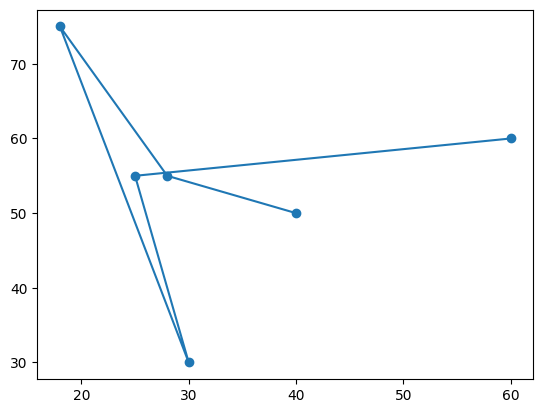

In [76]:
#generated_route = '033 6 6 6 6 4 , 2 3 7 4 6 4 7 , 1 30022 6 6 4 6 4 , 0 023333 7 4747 , 1000 6 6 6 4 6 , 3 3 2 7465 7 , 3 2 2 7 4765 , 3000 6 6'


# TODO: next try to change encoding schema to have more tokens on high level

activities = generated_route.split(',')

spatial_chrs = ['0', '1', '2', '3']
temporal_chrs = ['4', '5', '6', '7']


def decode_activity(activity):
    spatial = ''
    temporal = ''
    for chr in activity:
        if temporal == '' and chr in spatial_chrs:
            spatial += chr

        if spatial != '' and chr in temporal_chrs:
            temporal += chr
    
    return spatial, temporal



spatial_ids = []
for activity in activities:
    activity = activity.replace(' ', '')

    spatial_code, temporal_code = decode_activity(activity)

    spatial_data = encoder.spatial.tree.index.get(spatial_code, None)
    temporal_data = encoder.temporal.tree.index.get(temporal_code, None)

    print(f"{spatial_code=}, {spatial_data=} {temporal_code=}, {temporal_data=}")

    if spatial_data:
        spatial_ids.append(spatial_data[0].data)


print(spatial_ids)

xs, ys = zip(*[test_instance.customers[customer_id].coord for customer_id in spatial_ids])
plt.scatter(xs, ys)
plt.plot(xs, ys)